In [230]:
import pandas as pd

In [231]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [232]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [233]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [234]:
# Label encoder for 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [235]:
# ['Gender']
df['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

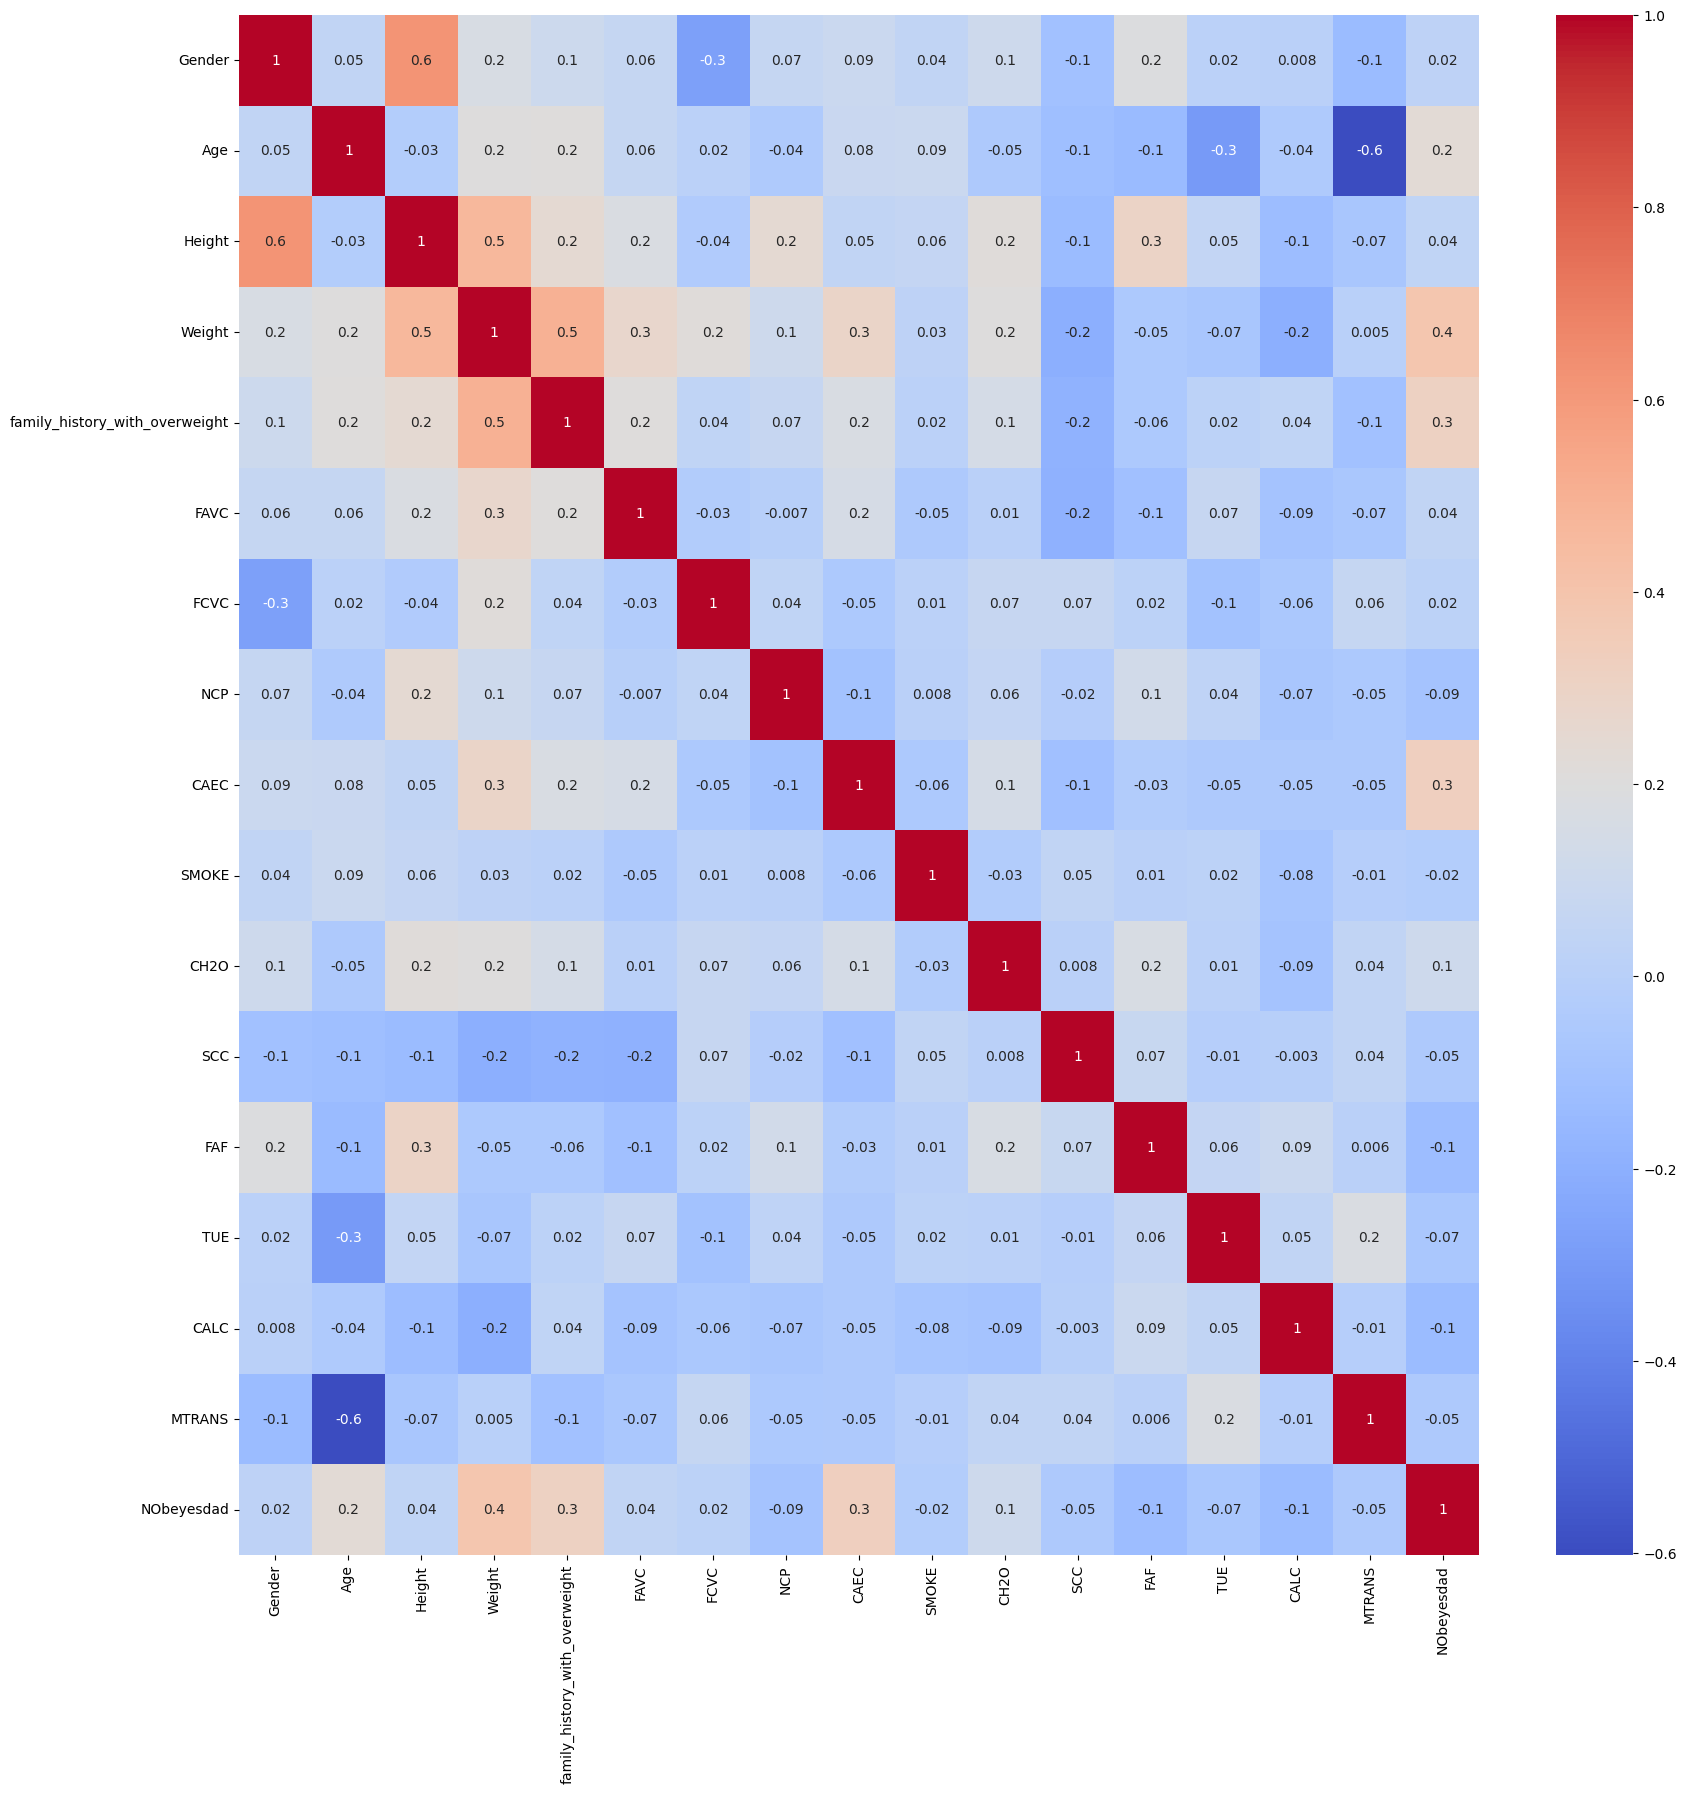

In [236]:
df.corr()
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

In [237]:
# Split the data, X is everything except 'NObeyesdad', y is 'NObeyesdad'
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn.predict(X_test)
accuracy_score(y_test, knn.predict(X_test))

0.8534278959810875

In [239]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        56
           1       0.75      0.44      0.55        62
           2       0.88      0.95      0.91        78
           3       0.95      0.93      0.94        58
           4       0.95      1.00      0.98        63
           5       0.75      0.86      0.80        56
           6       0.88      0.84      0.86        50

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.84       423
weighted avg       0.85      0.85      0.84       423



In [240]:
# import pickle

# # Save the model
# with open('knn_model.pkl', 'wb') as file:
#     pickle.dump(knn, file)

In [241]:
df['CH2O'].describe()

count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64

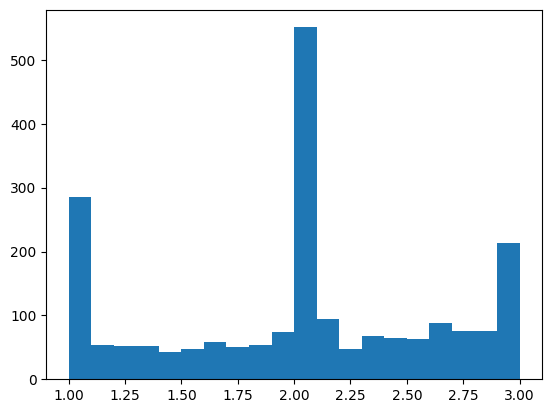

In [242]:
# Histogram for CH2O
plt.hist(df['CH2O'], bins=20)
plt.show()